In [150]:
%matplotlib inline

#Facial Recognition Using Eigenfaces

In this notebook, we will create a simple facial recognition program. We will be using the **faces94** dataset. First we need to import the necessary libraries.

In [151]:
import numpy as np
from scipy import linalg as la
from os import walk
from scipy.ndimage import imread
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import random

###Load Faces Dataset
We begin by creating a function to load all the faces. The code we will be using traverses through the given directory and loads all JPEG images. The images are flattened and then stored vertically in a matrix. For convenience, we will make the default path be the **./faces94** directory.

In [152]:
def getFaces(path='./faces94'):
    """Traverse the directory specified by 'path' and return an array containing
    one column vector per subdirectory.
    """
    # Traverse the directory and get one image per subdirectory
    faces = []
    for (dirpath, dirnames, filenames) in walk(path):
        for f in filenames:
            if f[-3:]=="jpg": # only get jpg images
                # load image, convert to grayscale, flatten into vector
                face = imread(dirpath+"/"+f).mean(axis=2).ravel()
                faces.append(face)
                break
    # put all the face vectors column-wise into a matrix
    return np.array(faces).T

###Show an image
The following function will take a flattened image and display it.

In [153]:
def show(im, w=200, h=180):
    """Plot the flattened grayscale image 'im' of width 'w' and height 'h'."""
    plt.imshow(im.reshape((w,h)), cmap=cm.Greys_r)
    plt.show()

For convenience, the following function **show2** will show two images side-by-side.

In [154]:
def show2(test_image, result, w=200, h=180):
    """Convenience function for plotting two flattened grayscale images of
    the specified width and height side by side
    """
    plt.subplot(121)
    plt.title("Input Image")
    plt.imshow(test_image.reshape((w,h)), cmap=cm.Greys_r)
    plt.axis("off")
    plt.subplot(122)
    plt.title("Closest Match")
    plt.imshow(result.reshape((w,h)), cmap=cm.Greys_r)
    plt.axis("off")
    plt.show()

###The FacialRec Class
We now create the FacialRec Class.  An object of this class is initialized with a pathname to the data set.  It flattens the images and loads them into a matrix.  We calculate the mean of images and shift each one by the mean, thus bringing out the unique characteristics of each face.

In [155]:
class FacialRec:
    def __init__(self, path):
        self.initFaces(path)
        self.initMeanImage()
        self.initDifferences()
        self.initEigenfaces()
        
    def initFaces(self, path):
        self.F = getFaces(path)
        
    def initMeanImage(self):
        self.mu = np.mean(self.F, axis = 1)
        
    def initDifferences(self):
        self.Fbar = self.F - np.vstack(self.mu)
        
    def initEigenfaces(self):
        self.U, s, Vt = la.svd(self.Fbar, full_matrices = False)
        
    def project(self, A, s=38):
        usT = np.transpose(self.U[:,:s])
        return usT.dot(A)
    
    def findNearest(self, image, s=38):
        """Return the index of the image in the array F which most closely 
        matches the given image.  Display the given image along with the closest match."""
        
        Fhat = self.project(self.Fbar, s)
        ghat = np.vstack(self.project(image - self.mu, s))
        diff = Fhat-ghat
        m,n = diff.shape
        norms = [np.linalg.norm(diff[:,i]) for i in xrange(n)]
        ind = np.argmin(norms, axis=0)
        show2(image, self.F[:,ind])
        return ind
        

In [156]:
face = FacialRec("./faces94")

####Show the mean face

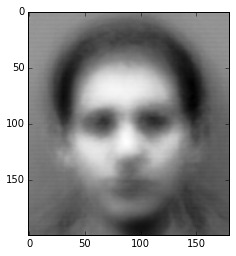

In [157]:
show(face.mu)

####Show the first mean-shifted face from the data set

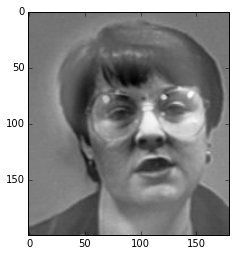

In [158]:
show(face.Fbar[:,0])

####Show the first eigenface

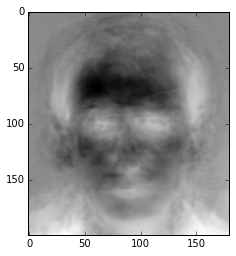

In [159]:
show(face.U[:,0])

###Wrapping Up
When we've finished our code, we can verify that everything works by testing on random images. The following will pull 5 images at random from the dataset.

####Create Sample Set of Faces

In [160]:
def sampleFaces(n_tests, path="./faces94"):
    """Return an array containing a sample of n_tests images contained
    in the path as flattened images in the columns of the output
    """
    files = []
    for (dirpath, dirnames, filenames) in walk(path):
        for f in filenames:
            if f[-3:]=="jpg": # only get jpg images
                files.append(dirpath+"/"+f)

    #Get a sample of the images
    test_files = random.sample(files, n_tests)
    #Flatten and average the pixel values
    images = np.array([imread(f).mean(axis=2).ravel() for f in test_files]).T
    return images

test_images = sampleFaces(5)

####Test it!

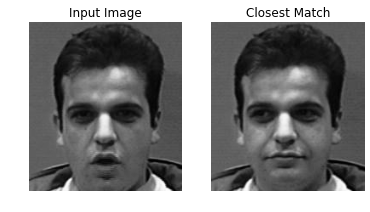

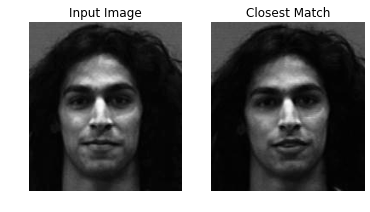

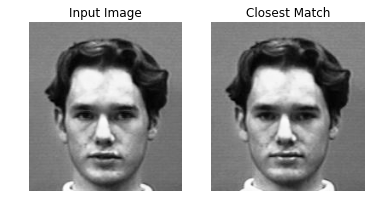

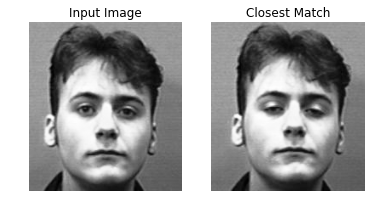

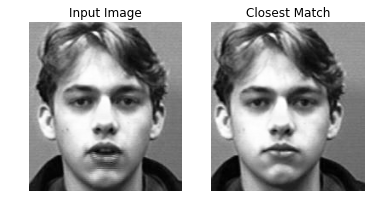

In [161]:
for i in xrange(5):
    index = face.findNearest(test_images[:,i])
    